## **Exploring the Documents File to Find Potential Text Instruments**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
documents = pd.read_csv('/content/drive/MyDrive/ECO225_Final_Project/DATA/documents.csv')
clean_cases_JFC = pd.read_csv('/content/drive/MyDrive/ECO225_Final_Project/DATA/clean_cases_JFC.csv')

<ipython-input-2-d79a198509b0>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  documents = pd.read_csv('/content/drive/MyDrive/ECO225_Final_Project/DATA/documents.csv')


In [3]:
matched_cases = clean_cases_JFC['case_number'].unique()
matched_documents = documents[documents['case_number'].isin(matched_cases)]

In [34]:
matched_documents['long_description'] = matched_documents['long_description'].dropna()

<ipython-input-34-1c658a9e1daa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_documents['long_description'] = matched_documents['long_description'].dropna()


In [35]:
docs_by_case = matched_documents.groupby('case_number')[ 'long_description'].apply(lambda x: ' - '.join(x))
docs_by_case = docs_by_case.reset_index()

In [36]:
docs_by_case['doc_descriptions'] = docs_by_case['long_description'].str.split('-')
docs_by_case

case_number  \
0     0:10-cv-02202   
1     0:10-cv-03601   
2     0:10-cv-03989   
3     0:10-cv-60674   
4     0:10-cv-60677   
...             ...   
8172  9:98-cv-04338   
8173  9:98-cv-04877   
8174  9:99-cv-01912   
8175  9:99-cv-04639   
8176  9:99-cv-08282   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [37]:
all_text =  matched_documents['long_description'].astype(str).tolist()

In [38]:
import spacy
from tqdm.auto import tqdm

# Ensure tqdm gets total count explicitly
total_rows = len(all_text)  # Get total count of texts

lemmatized_texts = []

# tqdm with manual total by wrapping pipe in enumerate()
for i, doc in enumerate(tqdm(nlp.pipe(all_text, batch_size=5000, n_process=2), total=total_rows)):
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.like_num and len(token) > 2]
    lemmatized_texts.append(" ".join(tokens))

matched_documents["cleaned_text"] = lemmatized_texts

  0%|          | 0/984512 [00:00<?, ?it/s]

<ipython-input-38-8d9287807e39>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_documents["cleaned_text"] = lemmatized_texts


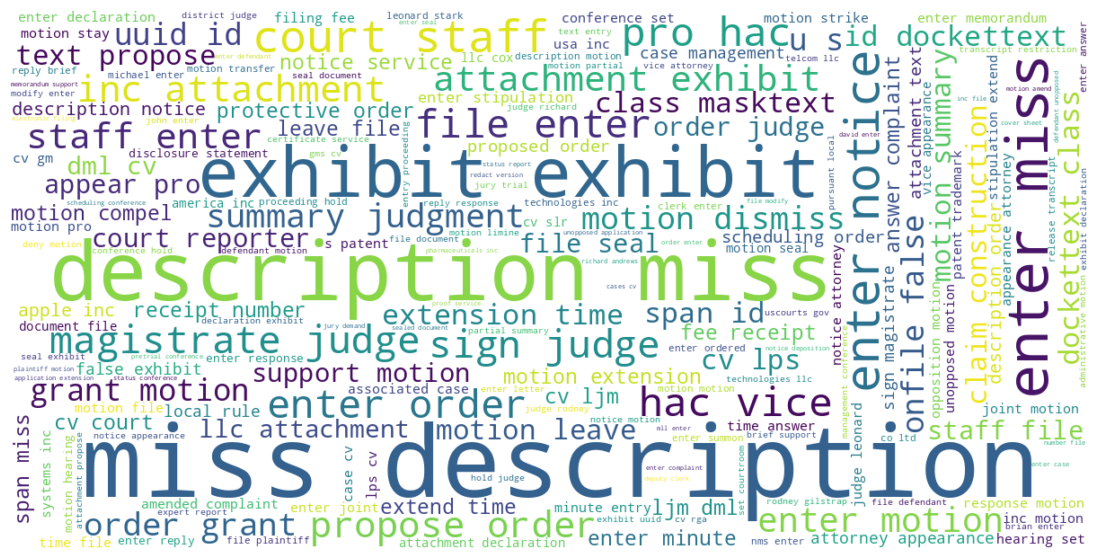

In [39]:
all_cleaned = ' '.join(matched_documents['cleaned_text'].astype(str).tolist())
wordcloud = WordCloud(width=1200, height=600, background_color="white").generate(all_cleaned)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

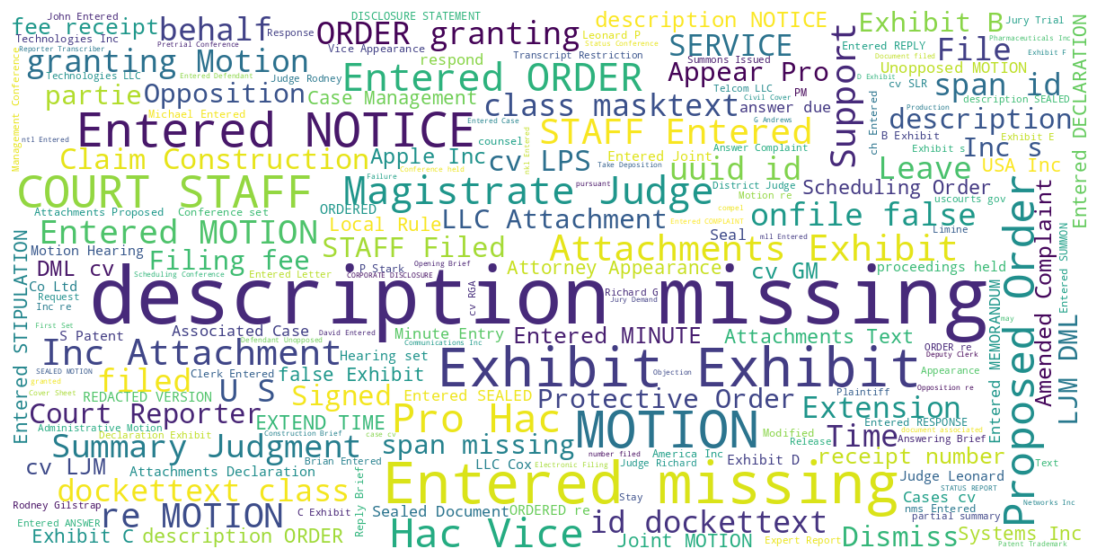

In [42]:
all_cleaned = ' '.join(matched_documents['long_description'].astype(str).tolist())
wordcloud = WordCloud(width=1200, height=600, background_color="white").generate(all_cleaned)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [40]:
pd.set_option('display.max_colwidth', None)
matched_documents.head()

,case_row_id,case_number,case_number_raw,district_id,doc_count,doc_number,short_description,long_description,attachment,doc_date_filed,doc_date_uploaded,document_url,cleaned_text
127,22.0,0:87-cv-06504,0:87-cv-06504-JLK,flsd,1,9.0,NaN,COPY OF PAPER DOCKET SHEET (Former Deputy Clerk) (Entered: 05/02/2003),NaN,2003-05-02,NaN,NaN,copy paper docket sheet deputy clerk enter 05/02/2003
992,43.0,0:90-cv-04396,0:90-cv-04396-LDW-DFJ,nyed,1,NaN,NaN,"Case closed (Sapienza, Lorraine) (Entered: 02/26/1992)",NaN,1992-02-25,NaN,NaN,case close sapienza lorraine enter 02/26/1992
993,43.0,0:90-cv-04396,0:90-cv-04396-LDW-DFJ,nyed,2,28.0,NaN,"ORDER, for permanent injunction ( signed by Judge Leonard D. Wexler ) dtd 2/25/92 that defts shall pay Littelfuse the sum of five thousand dollars; deft, its officers, etc. are permanently enjoined from infringing US Trademark Registrations Nos. 1,413,357 and 1,553,579 and any unauthorized use of the Littelfuse Cartridge Fuseholder Trade Dress,etc. c/m (Sapienza, Lorraine) (Entered: 02/26/1992)",NaN,1992-02-25,NaN,NaN,order permanent injunction sign judge leonard wexler dtd 2/25/92 deft shall pay littelfuse sum dollar deft officer etc permanently enjoin infringe trademark registrations nos unauthorized use littelfuse cartridge fuseholder trade dress etc sapienza lorraine enter 02/26/1992
994,43.0,0:90-cv-04396,0:90-cv-04396-LDW-DFJ,nyed,3,27.0,NaN,"ORDER withdrawing [5-1] motion for preliminary injunction ( signed by Judge Leonard D. Wexler ) dtd 11/25/91 on stip of parties. c/m (Sapienza, Lorraine) (Entered: 11/26/1991)",NaN,1991-11-26,NaN,NaN,order withdraw motion preliminary injunction sign judge leonard wexler dtd 11/25/91 stip party sapienza lorraine enter 11/26/1991
995,43.0,0:90-cv-04396,0:90-cv-04396-LDW-DFJ,nyed,4,26.0,NaN,"ORDER dtd. 10/30/91, pltff. & deft. to discuss settlement in good faith; until 11/21/91 defts shall not sell any fuses or fuseholders ( signed by Magistrate David F. Jordan ) c/m (Bollbach, Jean) (Entered: 10/31/1991)",NaN,1991-10-30,NaN,NaN,order dtd 10/30/91 pltff deft discuss settlement good faith 11/21/91 deft shall sell fuse fuseholder sign magistrate david jordan bollbach jean enter 10/31/1991


In [41]:
matched_documents.to_csv('matched_documents.csv', index=False)
from google.colab import files
files.download('matched_documents.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>